# Data Visualizaion

Data visualization is the practice of translating information into a visual context, such as a map or graph, to make data easier for the human brain to understand and pull insights from

## Seaborn

Seaborn is a statistical plotting library that is specifically designed to interact well with PANDAS 
data frames in order to create common statistical plot types like histograms and scatter plots. It's important to note that Seaborn, while being built directly off of maptplot lib, it actually uses a simpler one line syntax. 

### Scatter Plots

Scatter plots can show how different features are related to one another, the main theme between all relational plot types is they display how features are interconnected to each other.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('dm_office_sales.csv')

In [3]:
df.head()

,division,level of education,training level,work experience,salary,sales
0,printers,some college,2,6,91684,372302
1,printers,associate's degree,2,10,119679,495660
2,peripherals,high school,0,9,82045,320453
3,office supplies,associate's degree,2,5,92949,377148
4,office supplies,high school,1,5,71280,312802


In [17]:
df.tail()

,division,level of education,training level,work experience,salary,sales
995,computer hardware,associate's degree,1,1,70083,177953
996,computer software,associate's degree,1,0,68648,103703
997,peripherals,associate's degree,2,8,108354,450011
998,peripherals,associate's degree,2,3,79035,330354
999,computer hardware,some college,0,9,108444,364436


In [4]:
df.shape

(1000, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   division            1000 non-null   object
 1   level of education  1000 non-null   object
 2   training level      1000 non-null   int64 
 3   work experience     1000 non-null   int64 
 4   salary              1000 non-null   int64 
 5   sales               1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
training level,1000.0,1.262,0.925317,0.0,1.0,1.0,2.00,3.0
work experience,1000.0,6.142,2.947970,0.0,4.0,6.0,8.00,16.0
salary,1000.0,90264.207,17398.617174,41660.0,77584.0,89946.0,101834.25,159148.0
sales,1000.0,339833.846,108555.773316,53067.0,259257.5,338145.5,415210.25,761477.0


In [16]:
df.dtypes

division              object
level of education    object
training level         int64
work experience        int64
salary                 int64
sales                  int64
dtype: object

<AxesSubplot:xlabel='salary', ylabel='sales'>

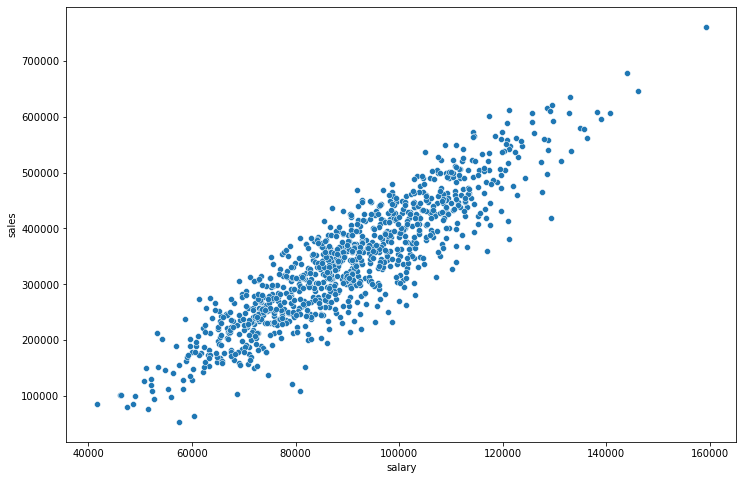

In [36]:
#Scatter plot
plt.figure(figsize=(12,8))
sns.scatterplot(x='salary',y='sales',data=df)

<AxesSubplot:xlabel='salary', ylabel='sales'>

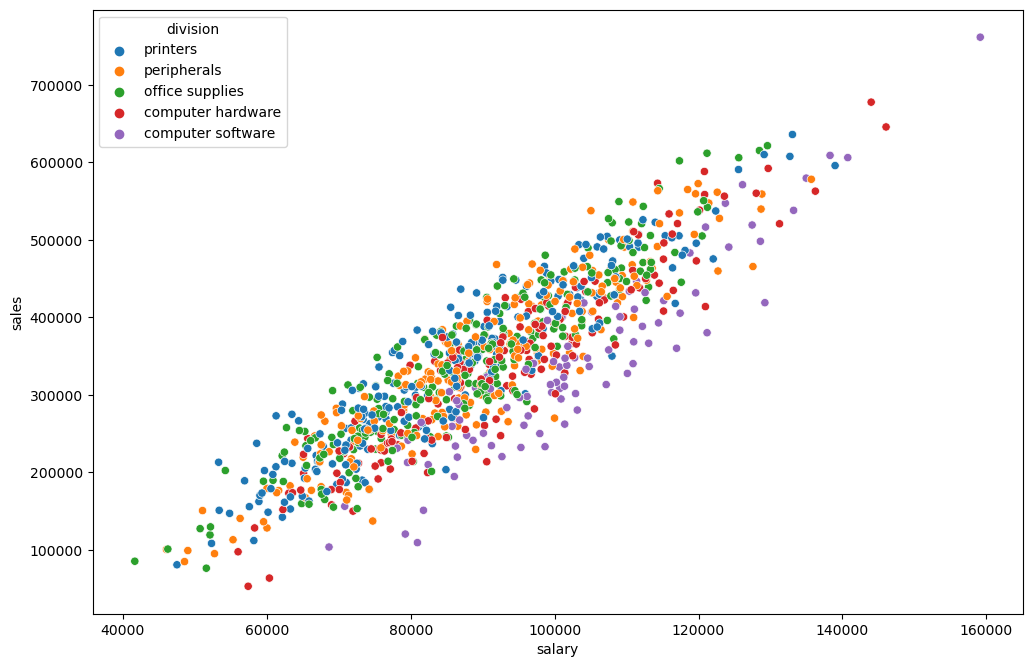

In [45]:
# HUE 
# Color points based off a categorical feature in the DataFrame


plt.figure(figsize=(12,8),dpi=100)
sns.scatterplot(x='salary',y='sales',data=df,hue='division')


<AxesSubplot:xlabel='salary', ylabel='sales'>

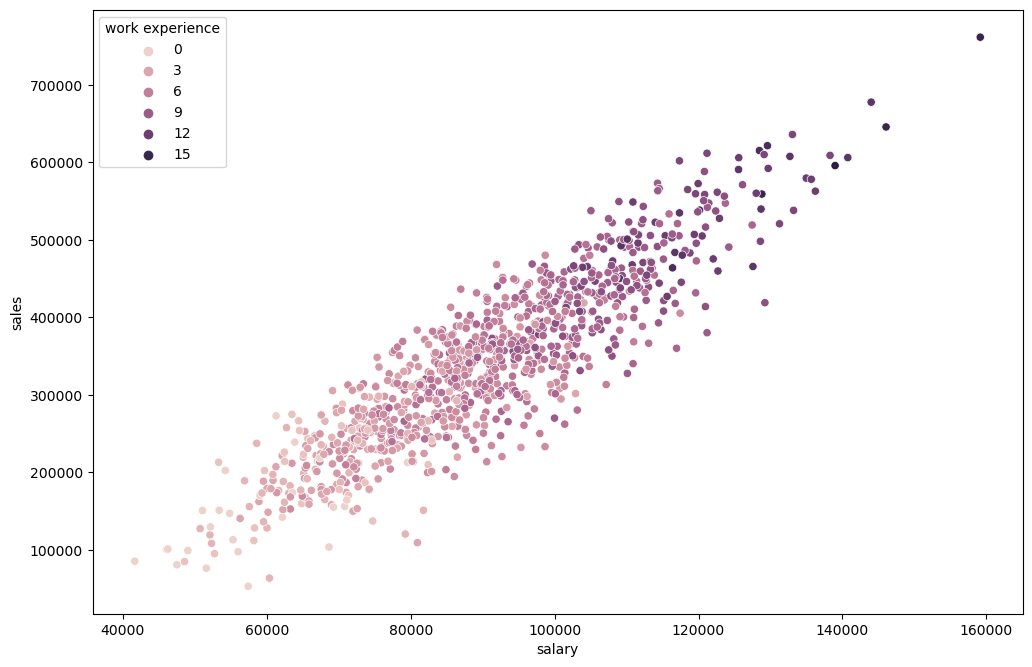

In [46]:
# HUE
# Color Gradient based off a continuous feature in the DataFrame

plt.figure(figsize=(12,8),dpi=100)
sns.scatterplot(x='salary',y='sales',data=df,hue='work experience')


<AxesSubplot:xlabel='salary', ylabel='sales'>

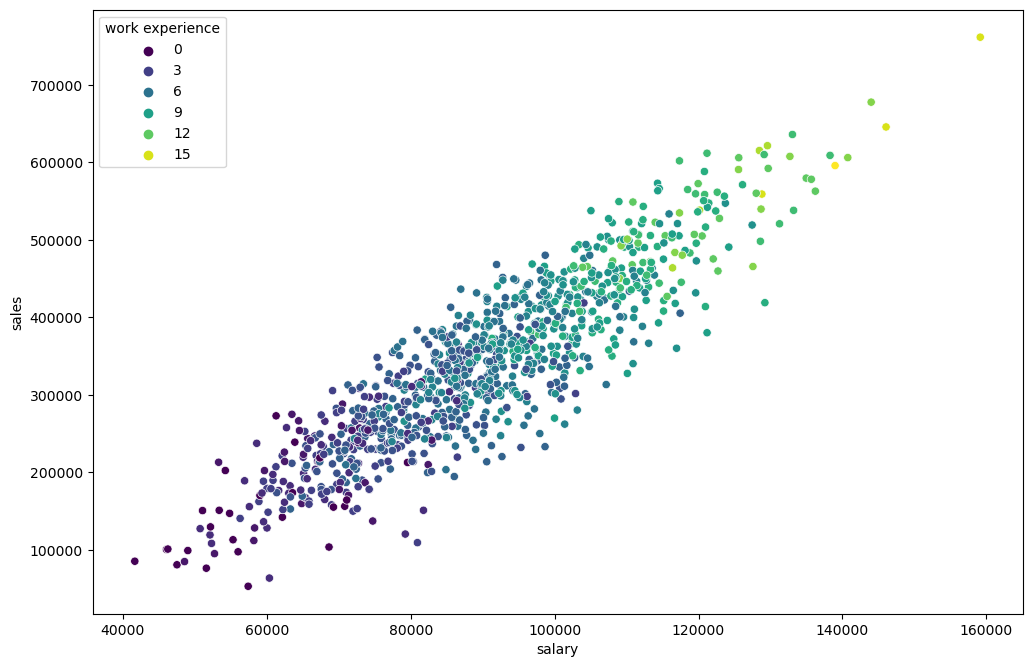

In [47]:
# We can also use palette parameter to select colors of our choice

plt.figure(figsize=(12,8),dpi=100)
sns.scatterplot(x='salary',y='sales',data=df,hue='work experience', palette='viridis')


<AxesSubplot:xlabel='salary', ylabel='sales'>

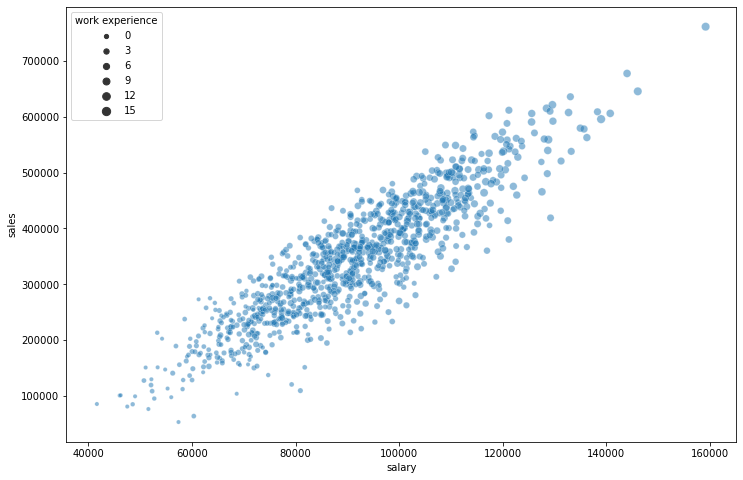

In [51]:
# other than colors we can also use size to differeniate between different features
# alpha parameter is used to control the transperency 

plt.figure(figsize=(12,8))
sns.scatterplot(x='salary',y='sales',data=df,size='work experience', alpha=0.5)

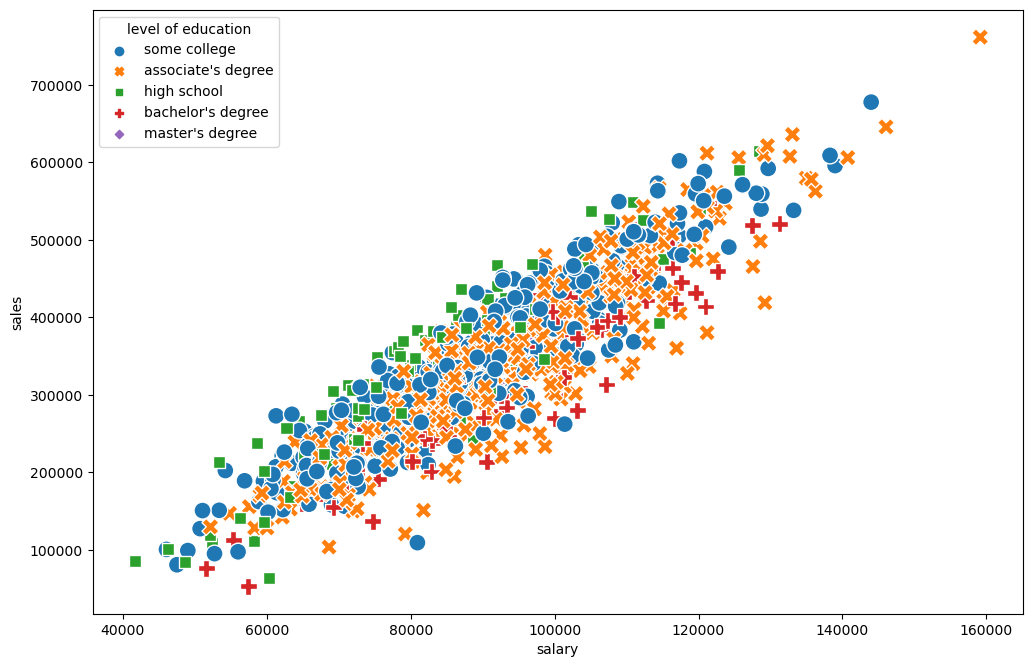

In [59]:
# we can use styles to have different kind of markers for our different catogries
# simple s is for the size of all the markers in the plot

plt.figure(figsize=(12,8),dpi=100)
sns.scatterplot(x='salary',y='sales',data=df,style='level of education',hue='level of education', s=150)
plt.savefig('Scatterplot.png')